In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
%matplotlib inline

In [2]:
documento = ['Sachin is considered to be one of the greatest cricket players',
             'Federer is considered to be one of the greatest tennis players',
             'Pele is considered to be one of the greatest football players',
             'Jordan is considered to be one of the greatest basketball players']

###### No caso do TFIDF, o único pré-processamento de texto é remover a pontuação e diminuir as letras maiúsculas e minúsculas. Nós não temos que nos preocupar com as StopWords. O TFIDF é a junção do TF e IDF

TF = número de vezes que o termo aparece no documento / número total de palavras no documento
IDF = ln (número de documentos / número de documentos em que o termo aparece)
Quanto maior a pontuação do TFIDF, mais raro é o termo e vice-versa.
O TFIDF é usado com sucesso pelos mecanismos de pesquisa, como o Google, como um fator de classificação para o conteúdo.

In [4]:
vect = CountVectorizer()

X = vect.fit(documento)
print(X.vocabulary_)
print(vect.get_feature_names())

{'sachin': 13, 'is': 7, 'considered': 2, 'to': 16, 'be': 1, 'one': 10, 'of': 9, 'the': 15, 'greatest': 6, 'cricket': 3, 'players': 12, 'federer': 4, 'tennis': 14, 'pele': 11, 'football': 5, 'jordan': 8, 'basketball': 0}
['basketball', 'be', 'considered', 'cricket', 'federer', 'football', 'greatest', 'is', 'jordan', 'of', 'one', 'pele', 'players', 'sachin', 'tennis', 'the', 'to']


In [5]:
documento_transformed = vect.transform(documento)
print(vect.get_feature_names())
documento_transformed.toarray()

['basketball', 'be', 'considered', 'cricket', 'federer', 'football', 'greatest', 'is', 'jordan', 'of', 'one', 'pele', 'players', 'sachin', 'tennis', 'the', 'to']


array([[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]], dtype=int64)

In [6]:
data = pd.DataFrame(documento_transformed.toarray())
data.columns = vect.get_feature_names()
print(documento)
data.head(4)

['Sachin is considered to be one of the greatest cricket players', 'Federer is considered to be one of the greatest tennis players', 'Pele is considered to be one of the greatest football players', 'Jordan is considered to be one of the greatest basketball players']


,basketball,be,considered,cricket,federer,football,greatest,is,jordan,of,one,pele,players,sachin,tennis,the,to
0,0,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,1
1,0,1,1,0,1,0,1,1,0,1,1,0,1,0,1,1,1
2,0,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,1
3,1,1,1,0,0,0,1,1,1,1,1,0,1,0,0,1,1


In [12]:
tfvect = TfidfVectorizer()
trans = tfvect.fit_transform(documento)
a = pd.DataFrame(trans.toarray(), columns = tfvect.get_feature_names())

In [13]:
a

,basketball,be,considered,cricket,federer,football,greatest,is,jordan,of,one,pele,players,sachin,tennis,the,to
0,0.000000,0.247352,0.247352,0.473999,0.000000,0.000000,0.247352,0.247352,0.000000,0.247352,0.247352,0.000000,0.247352,0.473999,0.000000,0.247352,0.247352
1,0.000000,0.247352,0.247352,0.000000,0.473999,0.000000,0.247352,0.247352,0.000000,0.247352,0.247352,0.000000,0.247352,0.000000,0.473999,0.247352,0.247352
2,0.000000,0.247352,0.247352,0.000000,0.000000,0.473999,0.247352,0.247352,0.000000,0.247352,0.247352,0.473999,0.247352,0.000000,0.000000,0.247352,0.247352
3,0.473999,0.247352,0.247352,0.000000,0.000000,0.000000,0.247352,0.247352,0.473999,0.247352,0.247352,0.000000,0.247352,0.000000,0.000000,0.247352,0.247352


In [11]:
import seaborn as sns

In [20]:
a.columns

Index(['basketball', 'be', 'considered', 'cricket', 'federer', 'football',
       'greatest', 'is', 'jordan', 'of', 'one', 'pele', 'players', 'sachin',
       'tennis', 'the', 'to'],
      dtype='object')

In [26]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   basketball  4 non-null      float64
 1   be          4 non-null      float64
 2   considered  4 non-null      float64
 3   cricket     4 non-null      float64
 4   federer     4 non-null      float64
 5   football    4 non-null      float64
 6   greatest    4 non-null      float64
 7   is          4 non-null      float64
 8   jordan      4 non-null      float64
 9   of          4 non-null      float64
 10  one         4 non-null      float64
 11  pele        4 non-null      float64
 12  players     4 non-null      float64
 13  sachin      4 non-null      float64
 14  tennis      4 non-null      float64
 15  the         4 non-null      float64
 16  to          4 non-null      float64
dtypes: float64(17)
memory usage: 672.0 bytes


In [21]:
lista = ['basketball', 'be', 'considered', 'cricket', 'federer', 'football',
       'greatest', 'is', 'jordan', 'of', 'one', 'pele', 'players', 'sachin',
       'tennis', 'the', 'to']

In [22]:
list(enumerate(lista))

[(0, 'basketball'),
 (1, 'be'),
 (2, 'considered'),
 (3, 'cricket'),
 (4, 'federer'),
 (5, 'football'),
 (6, 'greatest'),
 (7, 'is'),
 (8, 'jordan'),
 (9, 'of'),
 (10, 'one'),
 (11, 'pele'),
 (12, 'players'),
 (13, 'sachin'),
 (14, 'tennis'),
 (15, 'the'),
 (16, 'to')]

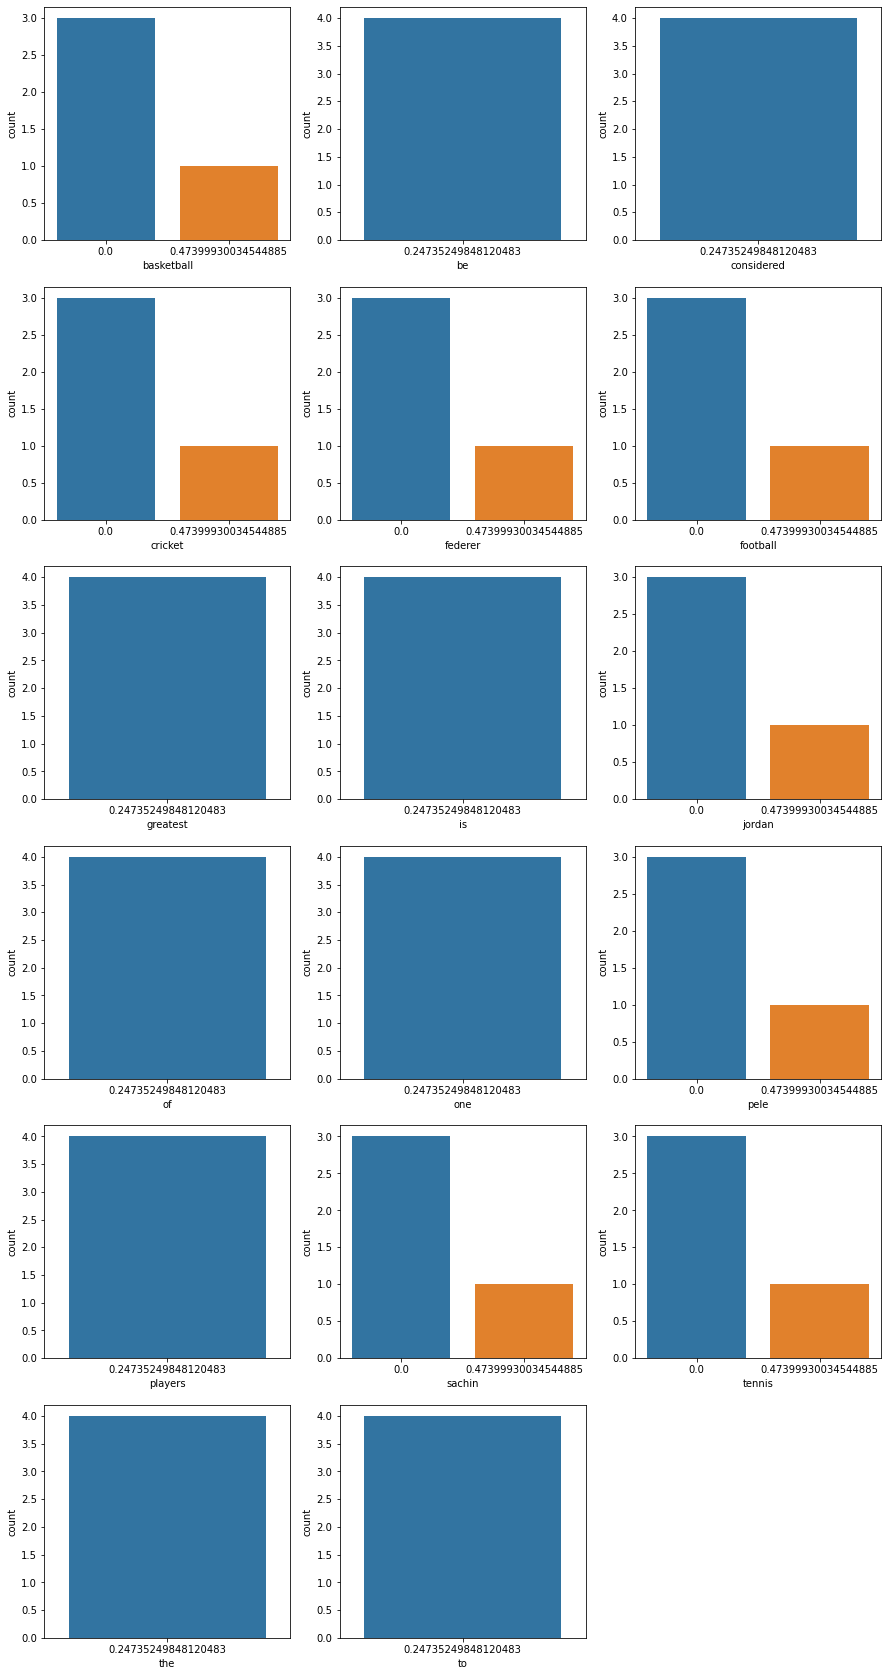

In [24]:
plt.figure(figsize =(15,30))
for i in enumerate(lista):
    plt.subplot(6, 3, i[0]+1)
    sns.countplot(x = i[1], data = a)